In [4]:
from torch.utils.data import Dataset, DataLoader, SequentialSampler
from HiSiNet.HiCDatasetClass import HiCDataset, HiCDatasetDec, SiameseHiCDataset, PairOfDatasets
from HiSiNet.reference_dictionaries import reference_genomes
from HiSiNet import models
import numpy as np
import sys
import seaborn as sns
import matplotlib.colors as colors
import pandas as pd
import torch
import random 
import matplotlib.pyplot as plt
import pandas as pd 
random.seed(100)


In [5]:
Nipbl_features=HiCDatasetDec.load('/Users/ealjibur/OneDrive - Imperial College London/fmlhic/NIPBLKO.fmlhic_slim')
ctcf_features=HiCDatasetDec.load('/Users/ealjibur/OneDrive - Imperial College London/fmlhic/CTCFdegron_features.fmlhic_slim')

In [6]:
filter_index=["all"]
Nipbl_different_filter_features = []
for nfilter in filter_index:
    currfeatures = []
    for chromosome in Nipbl_features.paired_maps.keys():
        if Nipbl_features.paired_maps[chromosome] is None: continue
        currfeatures.extend(Nipbl_features.extract_features(chromosome, nfilter, "conditions", qthresh=0.96))
    Nipbl_different_filter_features.append(currfeatures)

ctcf_different_filter_features = []
for nfilter in filter_index:
    currfeatures = []
    for chromosome in ctcf_features.paired_maps.keys():
        if ctcf_features.paired_maps[chromosome] is None: continue
        currfeatures.extend(ctcf_features.extract_features(chromosome, nfilter, "conditions", qthresh=0.96))
    ctcf_different_filter_features.append(currfeatures)

In [7]:
list_of_images = []
for i,nfilter in enumerate(filter_index):
    for name, features in [("NIPBLKO",Nipbl_different_filter_features), ("CTCFKO",ctcf_different_filter_features)]:
        curr=[(img_mets[1])*np.max(img_mets[1]) for img_mets in features[i]]
        list_of_images.extend(curr)
        

0


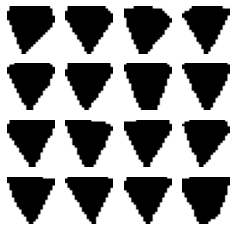

1


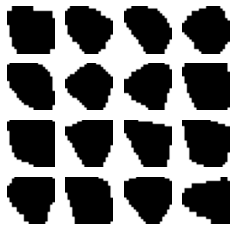

2


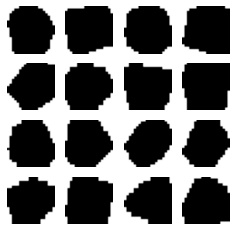

3


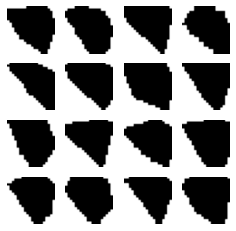

4


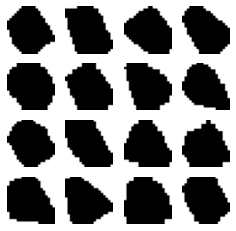

5


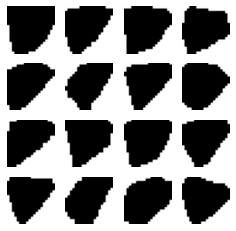

6


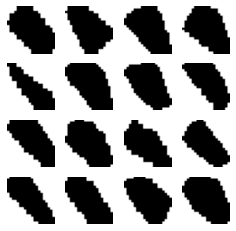

7


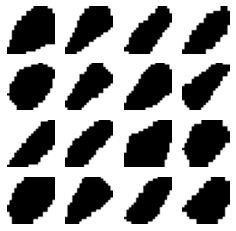

8


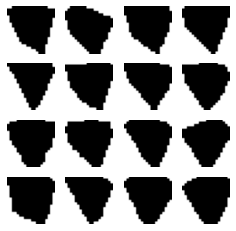

9


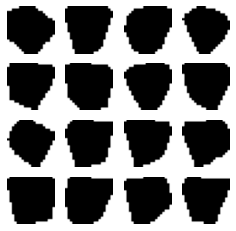

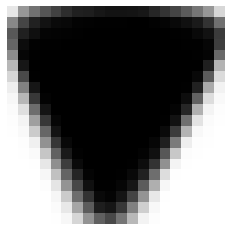

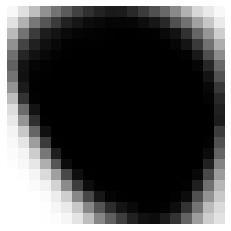

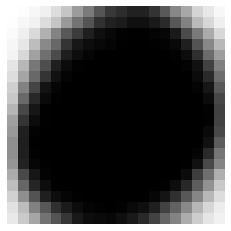

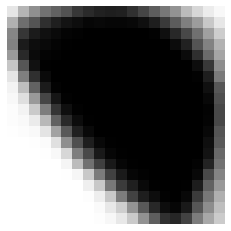

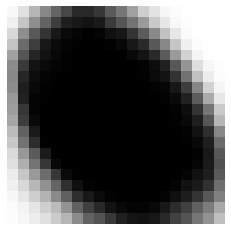

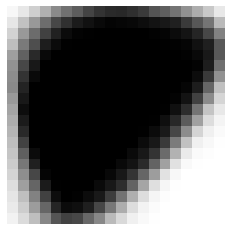

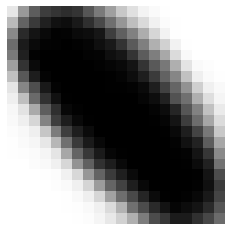

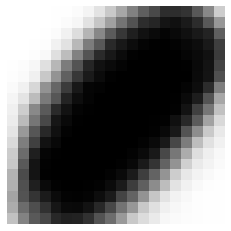

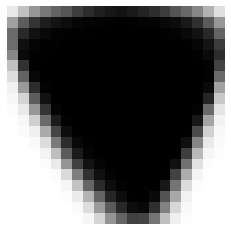

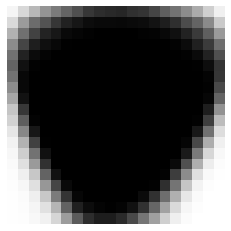

In [8]:
from sklearn.cluster import KMeans
k = 10
clusters = KMeans(k, random_state = 40)
x_train = np.array(list_of_images)
X_train = x_train.reshape(len(x_train),-1)
                                           
kmeans = clusters.fit(X_train)
np.unique(kmeans.labels_,return_counts=True)

n=4
for label in range(0,k):
    print(label)
    smpl = np.where(kmeans.labels_==label)[0]
    fig=plt.figure(figsize=(n, n))
    columns = n
    rows = n
    for i in range(0, columns*rows):
        img = np.random.randint(10, size=(3,3))
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(list_of_images[smpl[i]],cmap="Greys")
        plt.axis('off')
    plt.show()
    
smpl=np.zeros((k,list_of_images[0].shape[0],list_of_images[0].shape[1]))

for i in range(len(kmeans.labels_)):
    kmeans.labels_[i]
    smpl[kmeans.labels_[i],:,:]+=list_of_images[i]
    
for label in range(k):
    plt.imshow(smpl[label],cmap="Greys")
    plt.axis('off')
    plt.show()